<h1> Shane Reid - Computing for Business Research HW 2 </h1>

# Question 1 (80 points)

In this question you are tasked with writing modified versions of the web crawler that we covered in class

More specifically, you asked to create two webcrawlers for the following tasks:

    1. Crawl pages whose seed url is the press releases page of the Federal Reserve System: https://www.federalreserve.gov/newsevents/pressreleases.htm and collect pages that contain the word “covid” found within the page. The goal is to collect at least 10 such urls. At the end of the crawling the code should output the urls of the webpages found to contain the word “covid”. When checking whether the word is present on the webpage you should consider lower- and upper-case word versions (Covid, COVID, covid). One way to do this is to lowercase the webpage text prior to doing word matching.
       
    2. Crawl pages whose seed url is the press releases page of the Securities and Exchange Commission: https://www.sec.gov/news/pressreleases and collect urls of press releases that contain the word “charges”. The code should output the first 20 such links that  it finds. For each link output the url and the text. Similar to the previous task, when checking for the presence of the word “charges” you should consider lower- and upper-case versions.

<h2> Part 1 </h2>

In [1]:
from bs4 import BeautifulSoup
import urllib.request

In [2]:
seed_url = 'https://www.federalreserve.gov/newsevents/pressreleases.htm'
seed_page_url = 'https://www.federalreserve.gov/newsevents/pressreleases'

In [3]:
urls = [seed_url]
seen = [seed_url]
opened = []
covid_urls = []

In [4]:
maxNumUrl = 10

In [5]:
while len(urls) > 0 and len(covid_urls) < maxNumUrl:
    try:
        curr_url=urls.pop(0)
        # print("num. of URLs in stack: %d " % len(urls))
        # print("Trying to access= "+curr_url)
        req = urllib.request.Request(curr_url,headers={'User-Agent': 'Mozilla/5.0'})
        webpage = urllib.request.urlopen(req).read()
        opened.append(curr_url)

    except Exception as ex:
        print("Unable to access= "+curr_url)
        print(ex)
        continue

    # IF URL OPENS, CHECK WHICH URLS THE PAGE CONTAINS
    # ADD THE URLS FOUND TO THE QUEUE url AND seen
    soup = BeautifulSoup(webpage)  #creates object soup
    soup_string = str(soup).lower()
    
    if "covid" in soup_string:
        covid_urls.append(curr_url)
    
    # Put child URLs into the stack
    for tag in soup.find_all('a', href = True):
        childUrl = tag['href']
        o_childurl = childUrl
        childUrl = urllib.parse.urljoin(seed_page_url, childUrl)
        
        if seed_page_url in childUrl and childUrl not in seen:
            # print("***urls.append and seen.append***")
            urls.append(childUrl)
            seen.append(childUrl)
        else:
            # print("######")
            continue

Unable to access= https://www.federalreserve.gov/newsevents/pressreleases#content
HTTP Error 403: Forbidden
Unable to access= https://www.federalreserve.gov/newsevents/pressreleases
HTTP Error 403: Forbidden


In [6]:
covid_urls

['https://www.federalreserve.gov/newsevents/pressreleases/2021-press.htm',
 'https://www.federalreserve.gov/newsevents/pressreleases/2020-press.htm',
 'https://www.federalreserve.gov/newsevents/pressreleases/monetary20220615a.htm',
 'https://www.federalreserve.gov/newsevents/pressreleases/monetary20220504a.htm',
 'https://www.federalreserve.gov/newsevents/pressreleases/monetary20220126a.htm',
 'https://www.federalreserve.gov/newsevents/pressreleases/other20220523a.htm',
 'https://www.federalreserve.gov/newsevents/pressreleases/enforcement20220405a.htm',
 'https://www.federalreserve.gov/newsevents/pressreleases/other20220225a.htm',
 'https://www.federalreserve.gov/newsevents/pressreleases/bcreg20220214a.htm',
 'https://www.federalreserve.gov/newsevents/pressreleases/other20220114a.htm']

<h2> Part 2 </h2>

In [7]:
from bs4 import BeautifulSoup
import urllib.request

In [8]:
seed_url2 = 'https://www.sec.gov/news/pressreleases'
seed_page_url2 = "https://www.sec.gov/news/press-release"

In [9]:
urls2 = [seed_url2]
seen2 = [seed_url2]
opened2 = []
charges_urls = []

In [10]:
maxNumUrl2 = 21

In [11]:
while len(urls2) > 0 and len(charges_urls) < maxNumUrl2:
    try:
        curr_url2=urls2.pop(0)
        # print("num. of URLs in stack: %d " % len(urls))
        # print("Trying to access= "+curr_url)
        req2 = urllib.request.Request(curr_url2,headers={'User-Agent': 'Mozilla/5.0'})
        webpage2 = urllib.request.urlopen(req2).read()
        opened2.append(curr_url2)

    except Exception as ex:
        print("Unable to access= "+curr_url2)
        print(ex)
        continue

    # IF URL OPENS, CHECK WHICH URLS THE PAGE CONTAINS
    # ADD THE URLS FOUND TO THE QUEUE url AND seen
    soup2 = BeautifulSoup(webpage2)  #creates object soup
    soup_string2 = str(soup2).lower()
    
    if "charges" in soup_string2:
        charges_urls.append(curr_url2)
    
    # Put child URLs into the stack
    for tag2 in soup2.find_all('a', href = True):
        childUrl2 = tag2['href']
        o_childurl2 = childUrl2
        childUrl2 = urllib.parse.urljoin(seed_page_url2, childUrl2)
        
        if seed_page_url2 in childUrl2 and childUrl2 not in seen2:
            # print("***urls.append and seen.append***")
            urls2.append(childUrl2)
            seen2.append(childUrl2)
        else:
            # print("######")
            continue

Unable to access= https://www.sec.gov/news/press-release#main-content
HTTP Error 404: Not Found
Unable to access= https://www.sec.gov/news/press-release
HTTP Error 404: Not Found


In [12]:
# charges_urls

In [13]:
charges_urls = charges_urls[1:]
charges = []
for link in charges_urls:
    try:
        req = urllib.request.Request(link,headers={'User-Agent': 'Mozilla/5.0'})
        webpage = urllib.request.urlopen(req).read()
    except Exception as ex:
        print("Unable to access= "+link)
        print(ex)
        continue
    soup = BeautifulSoup(webpage)
    for tag in soup.find('h1', {'class':'article-title'}):
        text = tag.get_text()
    charges.append((link, text))

In [14]:
charges

[('https://www.sec.gov/news/press-release/2022-183',
  'SEC Charges Kim Kardashian for Unlawfully Touting Crypto Security'),
 ('https://www.sec.gov/news/press-release/2022-182',
  'SEC Charges Eight in Scheme to Fraudulently Promote Securities Offerings'),
 ('https://www.sec.gov/news/press-release/2022-181',
  'SEC Charges Two Canadian Software Engineers with Insider Trading'),
 ('https://www.sec.gov/news/press-release/2022-180',
  'SEC Charges Audit Firm RSM and Three Senior-Level Employees with Failure to Properly Conduct Client Audits'),
 ('https://www.sec.gov/news/press-release/2022-179',
  'Barclays Agrees to a $361 Million Settlement to Resolve SEC Charges Relating to Over-Issuances of Securities'),
 ('https://www.sec.gov/news/press-release/2022-178',
  'SEC Charges Man for Defrauding Investors out of Millions of Dollars by Posing as Hedge Fund Billionaire'),
 ('https://www.sec.gov/news/press-release/2022-176',
  'Deloitte’s Chinese Affiliate to Pay $20 Million Penalty for Asking

# Question 2: Git (20 points)

Create a Git repository on the GitHub platform named b9122_homework2 and perform the following:

• Populate the repository with the webcrawler code that we covered in class and the webcrawler code files that you created in Question 1.

• Create a README.md file where you’ll provide information about the repository including author information and description of the two code files.

• Make changes to at least one of the added files (whatever changes you prefer).

• Update the repository with the edited file/s.

• For those of you that will be doing the interaction with the github repository using git commands perform the following:
        
        The git log command displays the commit logs. Use output redirection (“>”) to store the output of this command in a file named gitlog.txt. Submit the gitlog.txt file and the url of your repository

• For those of you that will be using the GitHub Desktop application perform the following:
        
        The “History” tab displays the repository activities. Open this tab, take a screenshot. Submit the screenshot image and the url of your repository.

GitHub url - https://github.com/sreid-11/b9122_homework2

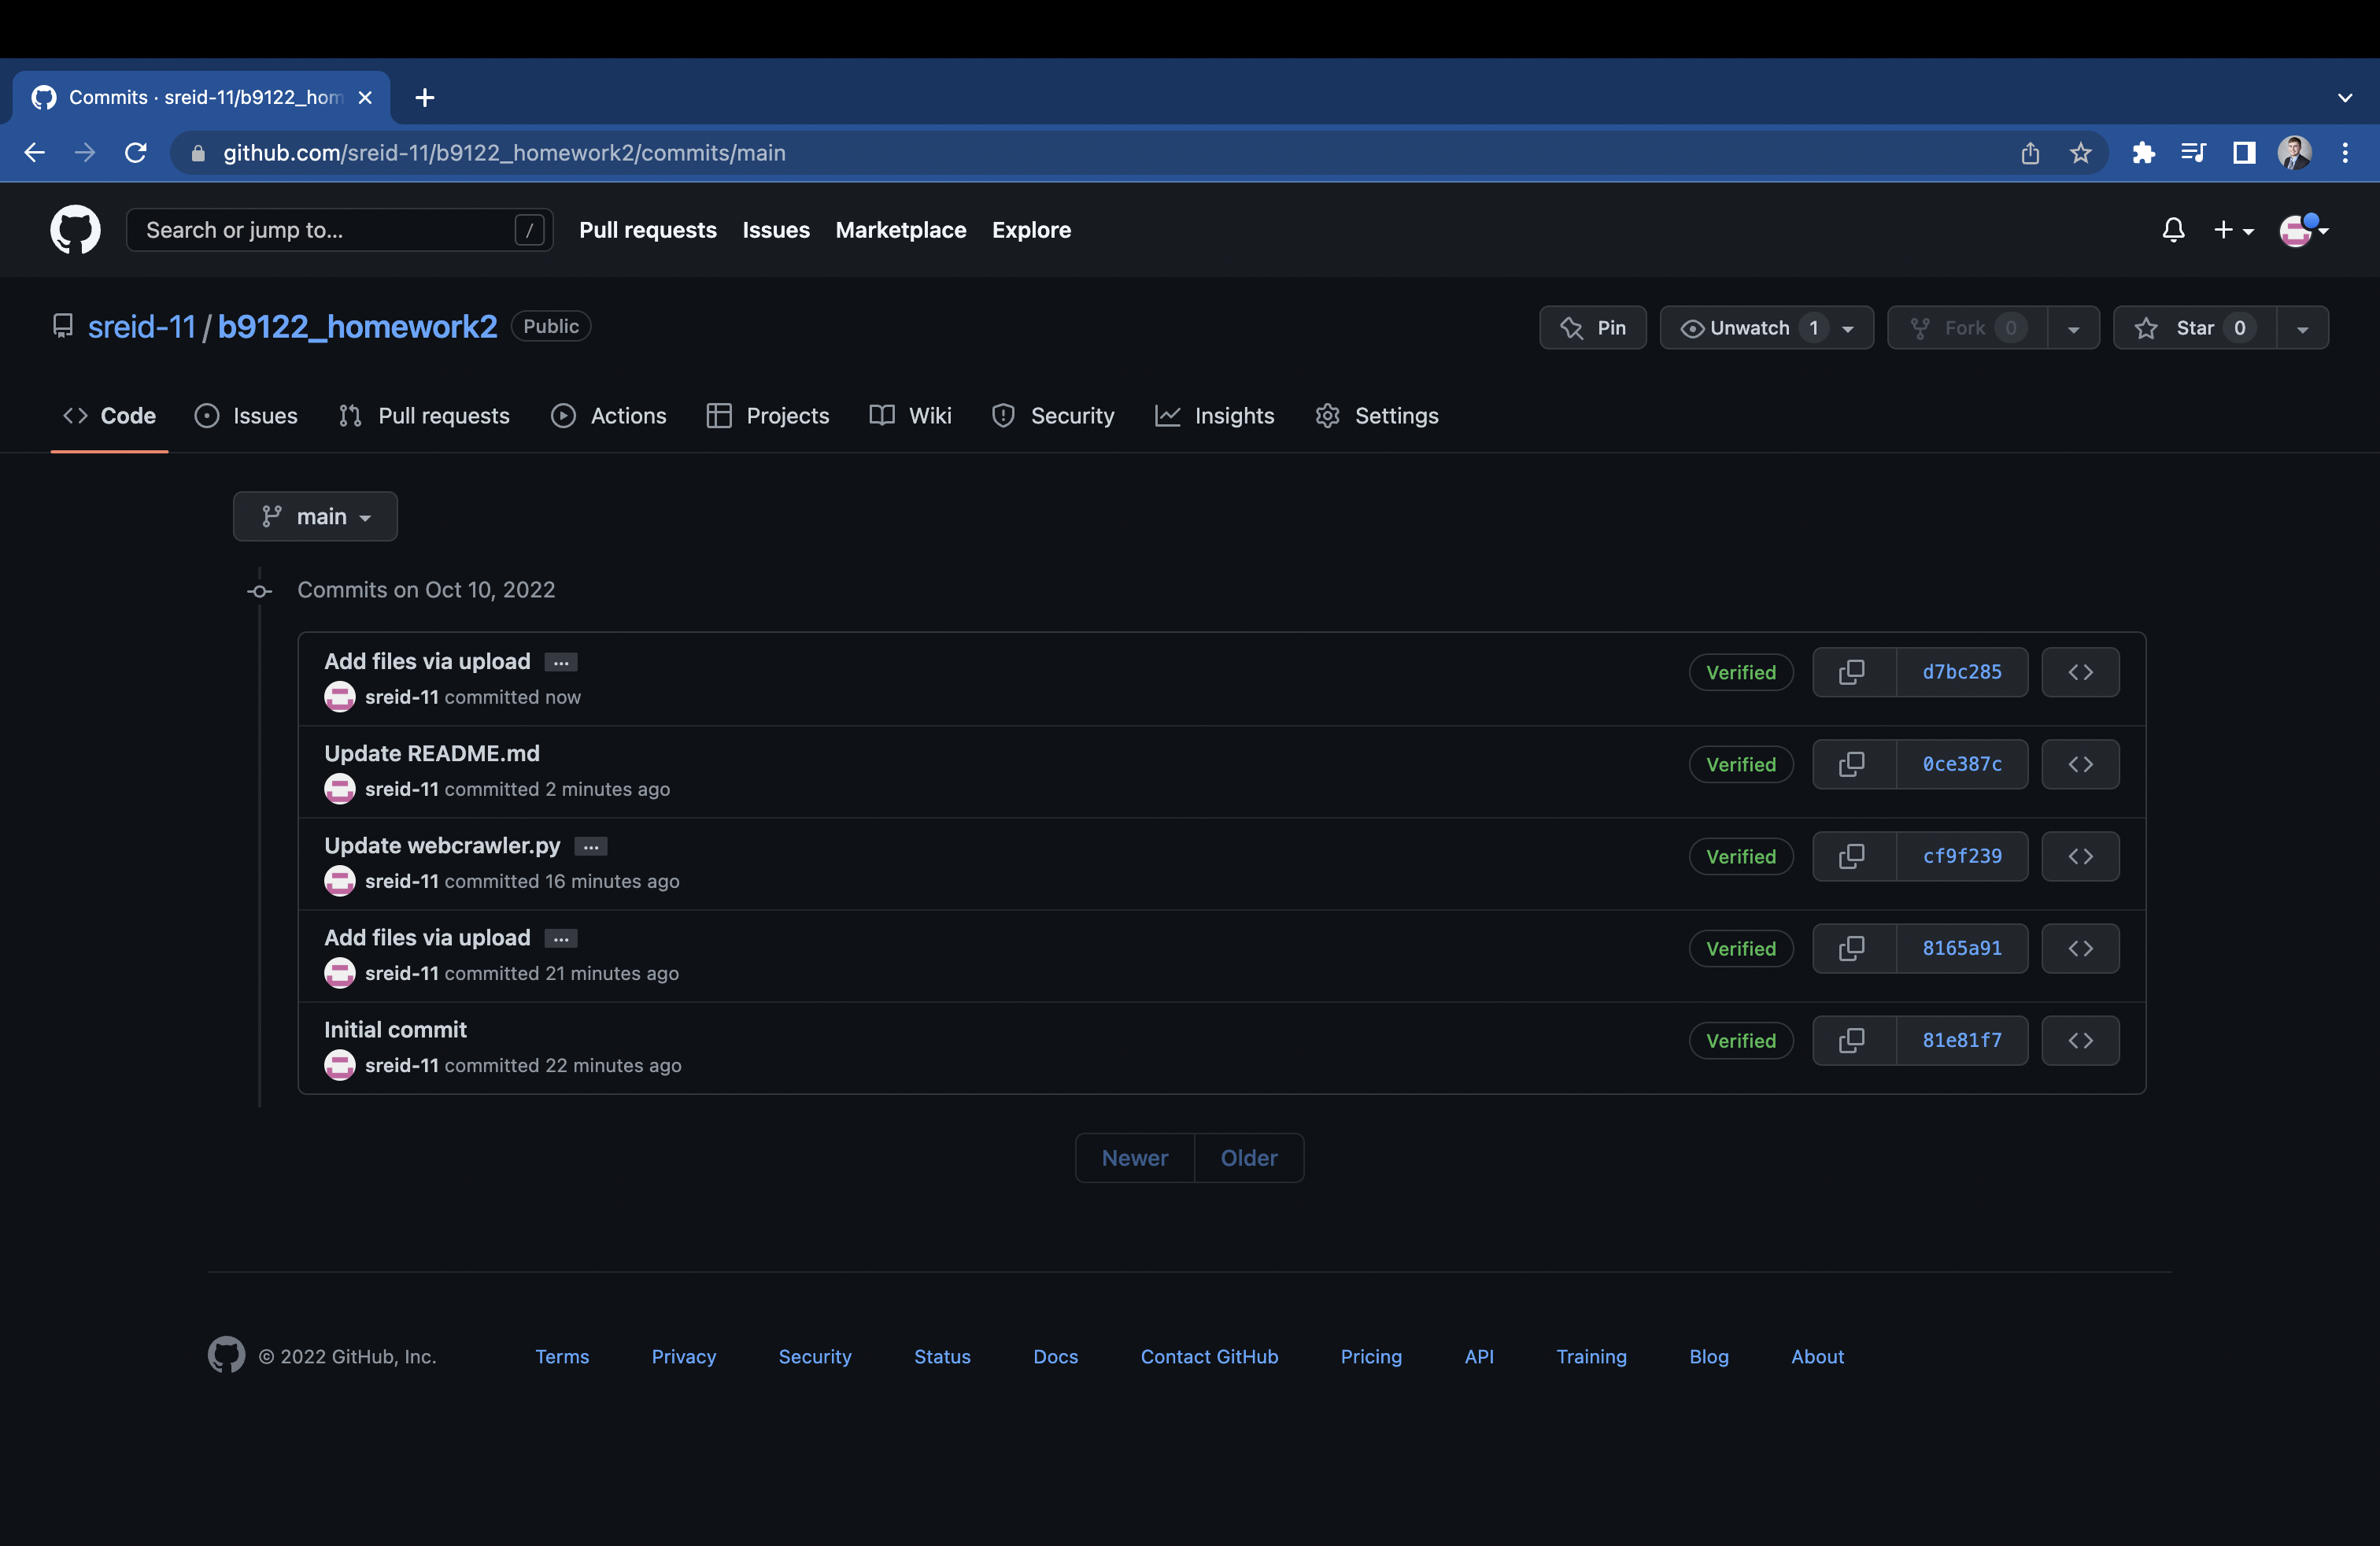